(200, 2) (200, 1)


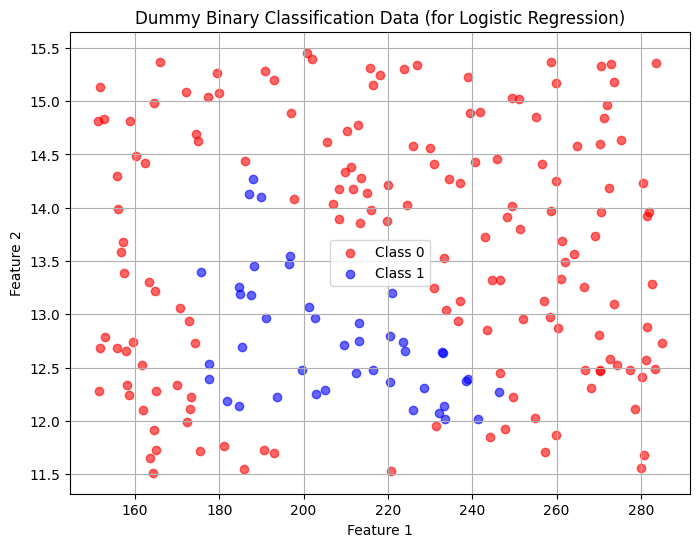

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

X,y = load_coffee_data()
print(X.shape, y.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color="blue", label="Class 1", alpha=0.6)
plt.title("Dummy Binary Classification Data (for Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
np.random.seed(0)

In [3]:
y = y.astype(np.int64)
# Flatten to 1D: shape becomes (num_examples,)
y = y.flatten()

# Determine number of classes
num_classes = np.max(y) + 1

# One-hot encoding
y = np.eye(num_classes)[y]

In [4]:
mean = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X - mean) / std 


In [5]:
def relu(x,grad):
    if grad:
        return (x > 0).astype(float)
    else:
        return np.maximum(0,x)
def sigmoid(x,grad):
    s = 1 / (1 + np.exp(-x))
    if grad:
        return s * (s - 1)
    else:
        return s
    
def softmax(z,grad):
    exps = np.exp(z - np.max(z, axis=1, keepdims=True))
    softmax_output = exps / np.sum(exps, axis=1, keepdims=True)
    
    return softmax_output


In [8]:
layers = [25,20,2]
activation = [relu,relu,softmax]
W = []
B = []
m = X.shape[0]  
alpha = 0.001
for i in range(len(activation)):
    if i == 0:
        w = np.random.randn(X.shape[1],layers[i])
    else:
        w = np.random.randn(layers[i-1],layers[i])

    b = np.zeros((1,layers[i]))        

    W.append(w)
    B.append(b)

0.1235866978148717


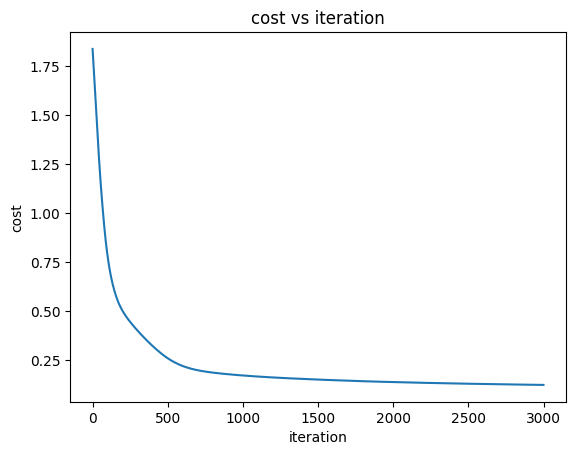

In [ ]:
all_cost= []
for i in range(3000):
    A = X
    all_z = []
    all_a = []
    for i in range(len(W)):
        Z = A @ W[i] + B[i]
        A = activation[i](Z,grad = False)

        all_z.append(Z)
        all_a.append(A)

    cost = ( - 1 / m) * (np.sum(y *(np.log(A+1e-8))))

    all_cost.append(cost)
    for i in range(len(W)-1, -1, -1):
        if i == len(W) - 1:
            dz = (all_a[i] - y)
        else:
            dz = (dz @ W[i+1].T) * activation[i](all_z[i], grad = True)

        if i == 0:
            dw = X.T @ dz
        else:
            dw = all_a[i-1].T @ dz

        W[i] = W[i] - (alpha / m) * dw
        B[i] = B[i] - (alpha / m) * np.sum(dz, keepdims=True, axis=0)

print(cost)
plt.plot(all_cost)
plt.title("cost vs iteration")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()